INTEGRANTES
* SEBASTIAN CAÑON
* DANIEL CITA
* SERGIO MACHADO
* CAMILA ARGOTY




#**Airfoil Self-Noise**



El data set proeniente de la NASA muestra perfiles aerodinamicos de NACA 0012, siendo un perfil aereodinamico la geometría transversal de un ala, que al desplazarse a través de algún fluido, genera sustentación. Por consiguiente se tiene datos de diferentes tamaños a diferentes velocidades en un tunel de viento y angulos de ataque. La energadura del perfil y la posicion del obsevador fueron las mismas en todos los experimentos:

- Frequency (Frecuencia): Dada en Hertzs.
- Angle of attack (Angulo de ataque): Dada en grados.
- Chord length (Longitud de cuerda): Dada en metros.
- Free-stream velocity (Velocidad de flujo libre): Dada en metros por segundos.
- Suction side displacement thickness (Espesor de deslizamiento en el lado de succion): Dada en metros.
- Scaled sound pressure level (nivel de presion sonora escalado): Dada en decibeles.

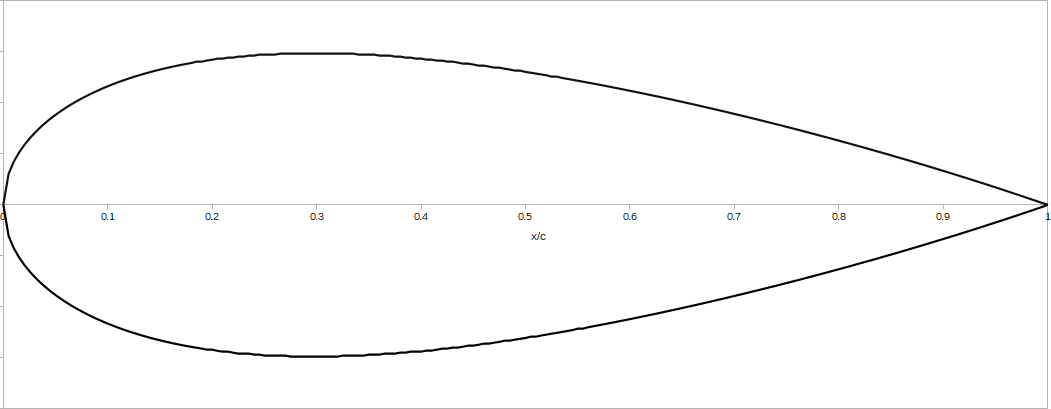

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Librerias que fueron utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import animation
from IPython.display import HTML

# Lectura de organizacion del dataset
dataset = '/content/drive/MyDrive/airfoil_self_noise.dat'
df = pd.read_csv(dataset, sep='\t', names=['Frequency(Hz)', 'Angle of attack(deg)', 'Chord length(mts)', 'Free-stream velocity(m/s)', 'Suction side displacement thickness(mts)', 'Scaled sound pressure level(dB)'])
df.head(8)

,Frequency(Hz),Angle of attack(deg),Chord length(mts),Free-stream velocity(m/s),Suction side displacement thickness(mts),Scaled sound pressure level(dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061


In [ ]:
# Informacion de el tipo de variables del dataset(Dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Frequency(Hz)                             1503 non-null   int64  
 1   Angle of attack(deg)                      1503 non-null   float64
 2   Chord length(mts)                         1503 non-null   float64
 3   Free-stream velocity(m/s)                 1503 non-null   float64
 4   Suction side displacement thickness(mts)  1503 non-null   float64
 5   Scaled sound pressure level(dB)           1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [ ]:
#Organizacion de matrices
df.shape

(1503, 6)

In [ ]:
df.head(10)

,Frequency(Hz),Angle of attack(deg),Chord length(mts),Free-stream velocity(m/s),Suction side displacement thickness(mts),Scaled sound pressure level(dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


In [ ]:
df.tail(10)

,Frequency(Hz),Angle of attack(deg),Chord length(mts),Free-stream velocity(m/s),Suction side displacement thickness(mts),Scaled sound pressure level(dB)
1493,800,15.6,0.1016,39.6,0.052849,118.964
1494,1000,15.6,0.1016,39.6,0.052849,119.224
1495,1250,15.6,0.1016,39.6,0.052849,118.214
1496,1600,15.6,0.1016,39.6,0.052849,114.554
1497,2000,15.6,0.1016,39.6,0.052849,110.894
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


#**HEAT MAP**
---

Un heatmap presenta los datos en forma de diagrama o mapa, con diferentes colores que representan conjuntos de datos y valores.



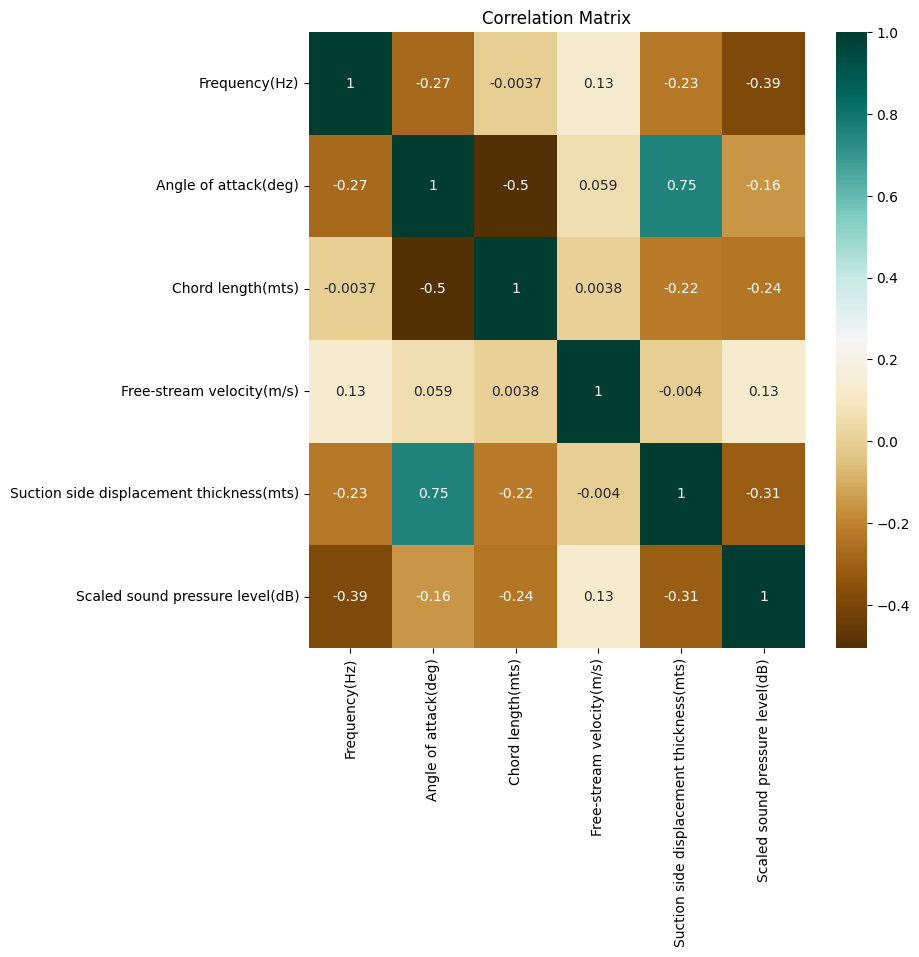

In [ ]:
# Matriz de correlaciones para el analisis de variables a visualizar
plt.figure(figsize=(8, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG')
c = df.corr()
c
plt.title('Correlation Matrix')
plt.show()

# **PAIR PLOTS**
---

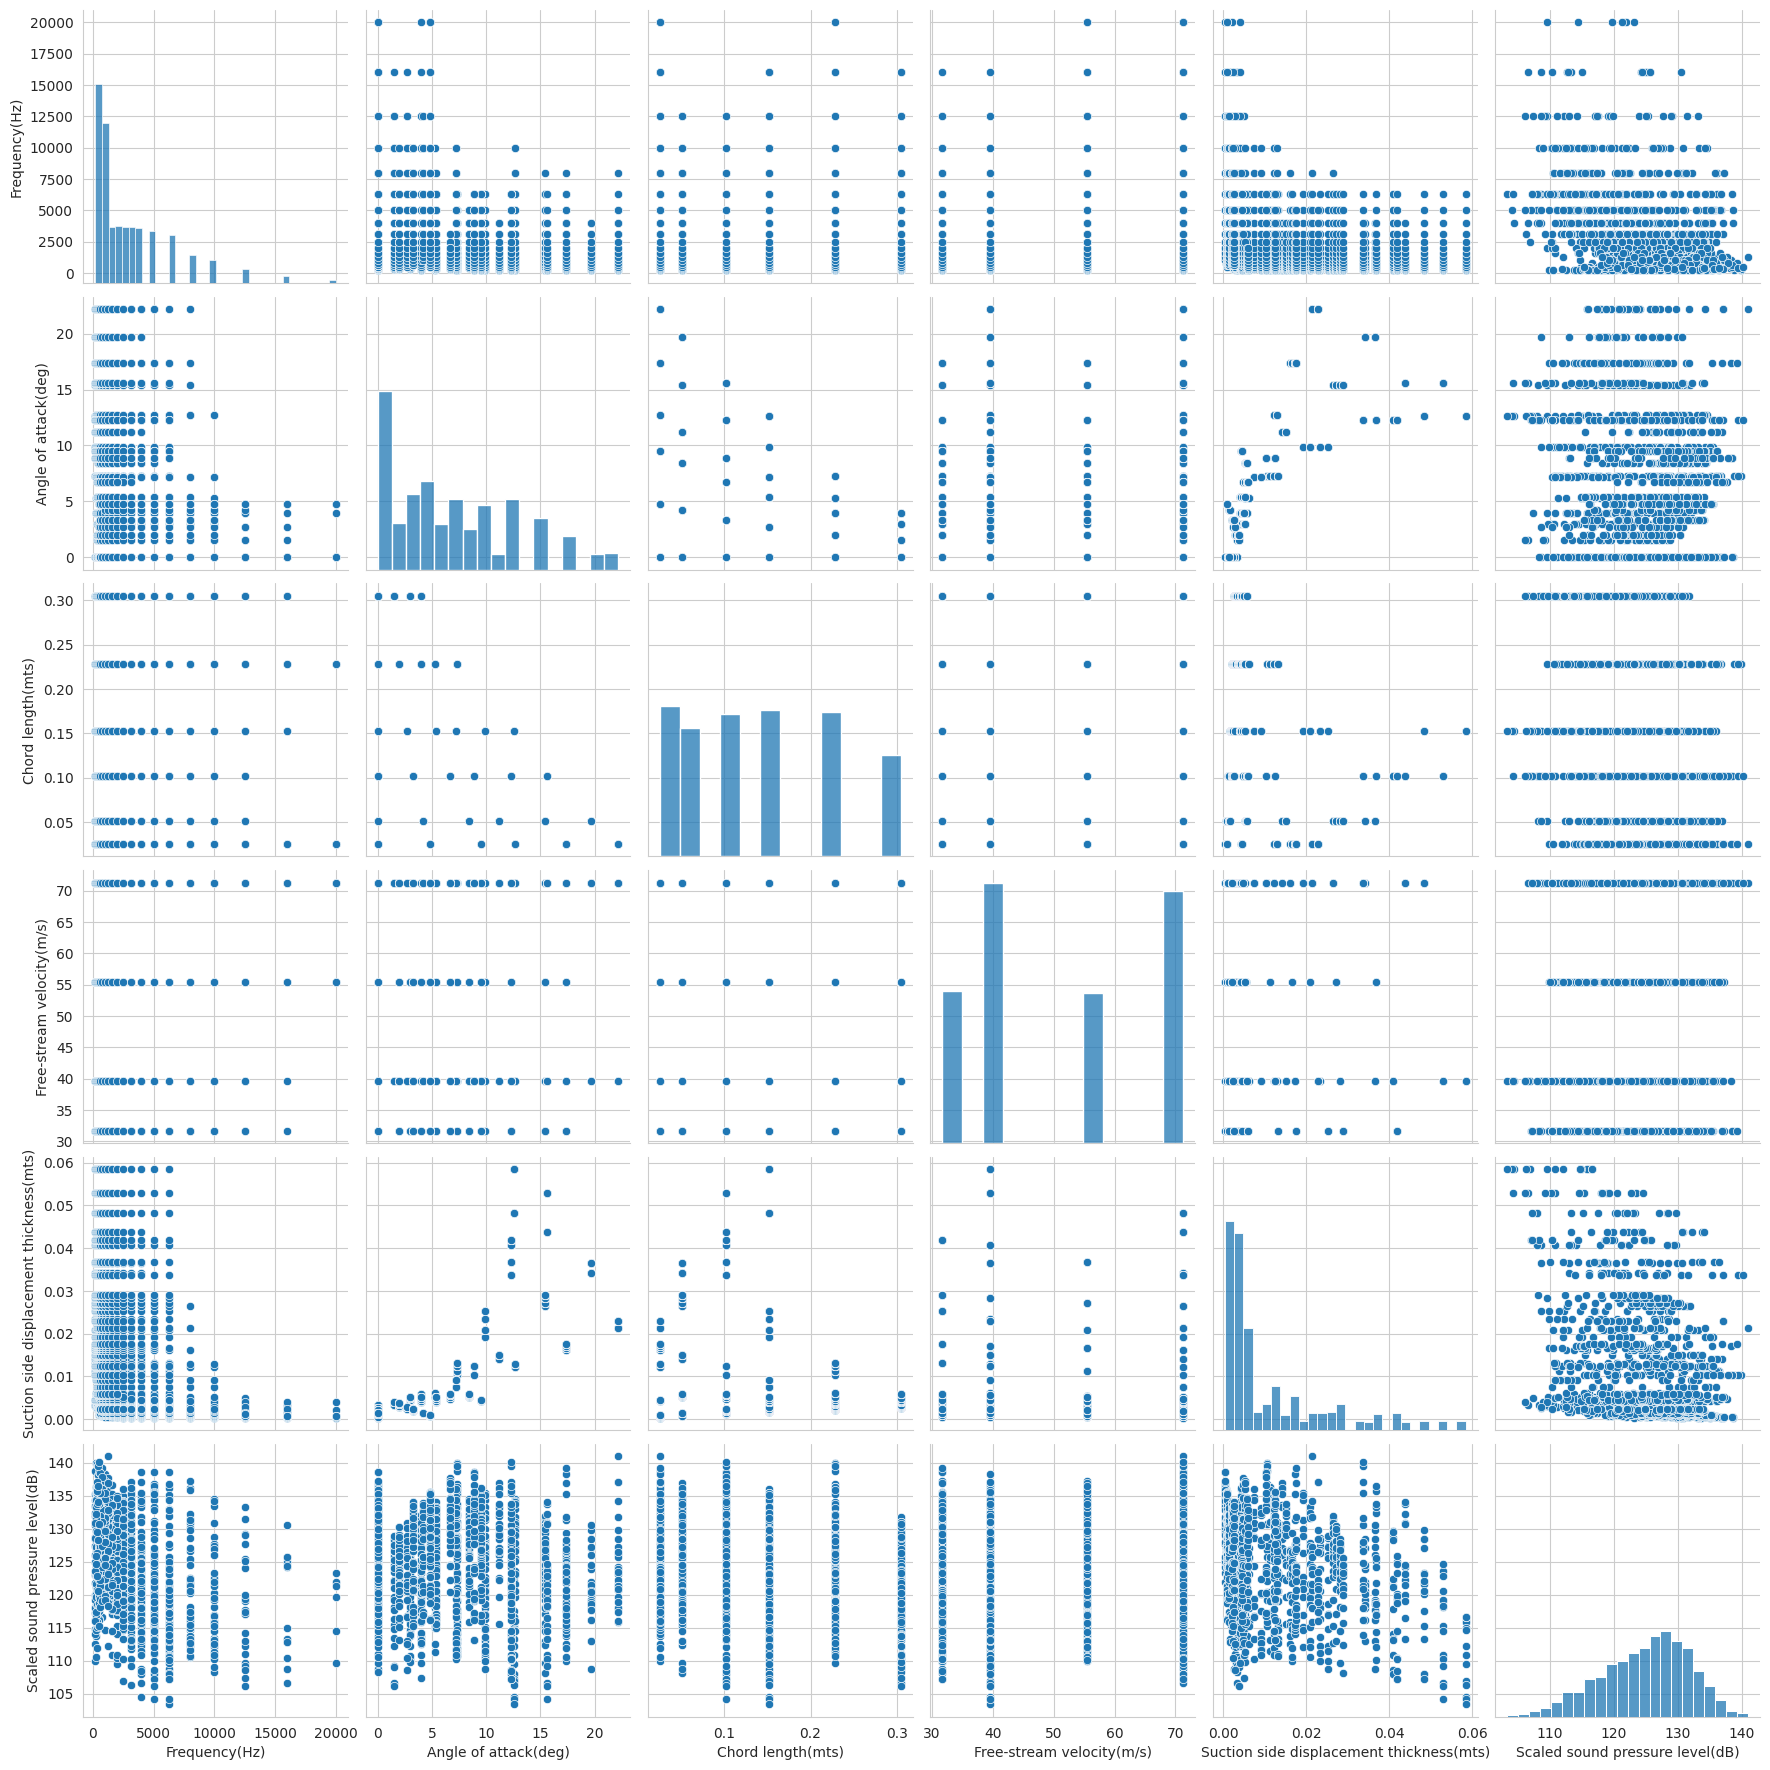

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, height=3);
plt.show()

#**SCATTERPLOT**
---

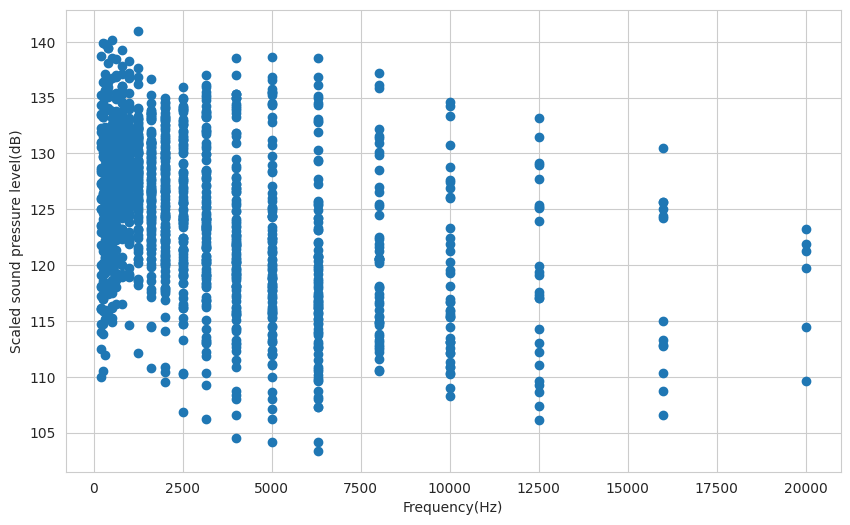

In [ ]:
# Analisis de datos
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Frequency(Hz)'], df['Scaled sound pressure level(dB)'])
ax.set_xlabel('Frequency(Hz)')
ax.set_ylabel('Scaled sound pressure level(dB)')
y_min = df['Scaled sound pressure level(dB)'].min()
y_max = df['Scaled sound pressure level(dB)'].max()
X_min = df['Frequency(Hz)'].min()
X_max = df['Frequency(Hz)'].max()


plt.show()

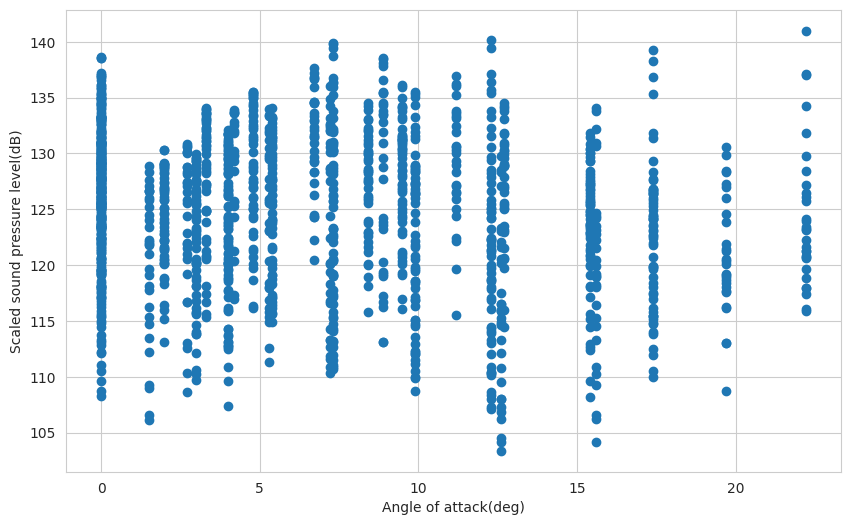

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Angle of attack(deg)'], df['Scaled sound pressure level(dB)'])
ax.set_xlabel('Angle of attack(deg)')
ax.set_ylabel('Scaled sound pressure level(dB)')
y_min = df['Scaled sound pressure level(dB)'].min()
y_max = df['Scaled sound pressure level(dB)'].max()
X_min = df['Angle of attack(deg)'].min()
X_max = df['Angle of attack(deg)'].max()
plt.show()

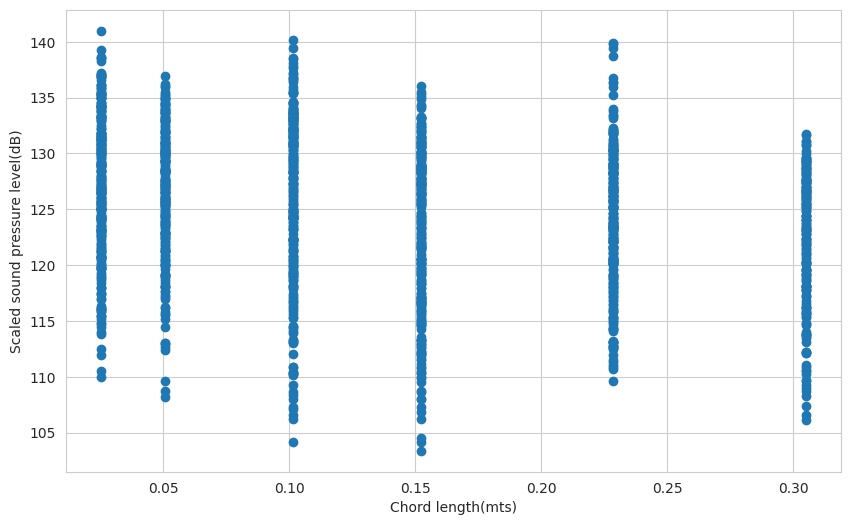

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Chord length(mts)'], df['Scaled sound pressure level(dB)'])
ax.set_xlabel('Chord length(mts)')
ax.set_ylabel('Scaled sound pressure level(dB)')
y_min = df['Scaled sound pressure level(dB)'].min()
y_max = df['Scaled sound pressure level(dB)'].max()
X_min = df['Chord length(mts)'].min()
X_max = df['Chord length(mts)'].max()

plt.show()

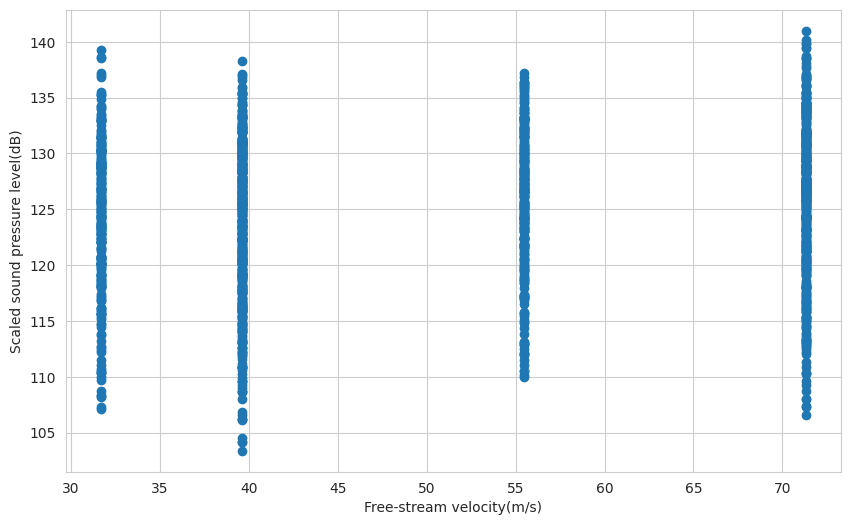

In [ ]:

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Free-stream velocity(m/s)'], df['Scaled sound pressure level(dB)'])
ax.set_xlabel('Free-stream velocity(m/s)')
ax.set_ylabel('Scaled sound pressure level(dB)')
y_min = df['Scaled sound pressure level(dB)'].min()
y_max = df['Scaled sound pressure level(dB)'].max()
X_min = df['Free-stream velocity(m/s)'].min()
X_max = df['Free-stream velocity(m/s)'].max()

plt.show()

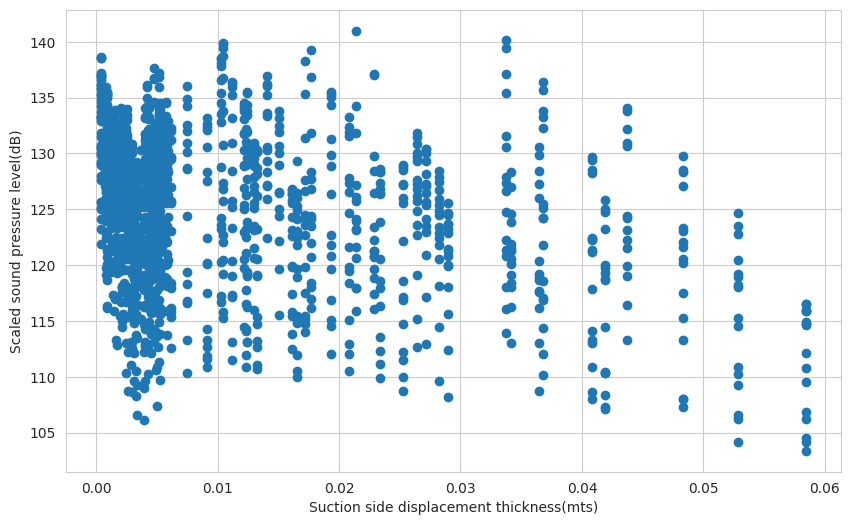

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Suction side displacement thickness(mts)'], df['Scaled sound pressure level(dB)'])
ax.set_xlabel('Suction side displacement thickness(mts)')
ax.set_ylabel('Scaled sound pressure level(dB)')
y_min = df['Scaled sound pressure level(dB)'].min()
y_max = df['Scaled sound pressure level(dB)'].max()
X_min = df['Suction side displacement thickness(mts)'].min()
X_max = df['Suction side displacement thickness(mts)'].max()


plt.show()

# **PRUEBA 1**
---

Utilizando la ecuacion normal

$\hat{\theta} = (X^TX)^{-1}X^TY$





In [ ]:
X = df.copy()
y = X.pop('Scaled sound pressure level(dB)')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train = y_train.values.reshape(1052,1)
y_test = y_test.values.reshape(451,1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1052, 5)
(451, 5)
(1052, 1)
(451, 1)


In [ ]:

x = np.ones((1052, 6))

# Asignar los datos de x_train a todas las columnas excepto la primera
x[:, 1:] = X_train

# Imprimir las primeras 5 filas para verificar
print(x[0:5, :])


[[1.00000e+00 2.50000e+03 1.74000e+01 2.54000e-02 3.96000e+01 1.72206e-02]
 [1.00000e+00 2.50000e+03 6.70000e+00 1.01600e-01 7.13000e+01 4.78288e-03]
 [1.00000e+00 4.00000e+03 0.00000e+00 1.01600e-01 3.96000e+01 1.46332e-03]
 [1.00000e+00 6.30000e+02 2.70000e+00 1.52400e-01 3.96000e+01 2.94804e-03]
 [1.00000e+00 1.60000e+04 0.00000e+00 2.28600e-01 7.13000e+01 2.14345e-03]]


In [ ]:
y = y_train
x_prod = np.dot(np.transpose(x),x)
x_inv = np.linalg.inv(x_prod)
x_comp = np.dot(x_inv,np.transpose(x))
theta = np.dot(x_comp, y)
print(theta)

[[ 1.32477800e+02]
 [-1.27257557e-03]
 [-3.65257541e-01]
 [-3.46169632e+01]
 [ 9.99913656e-02]
 [-1.57201730e+02]]


In [ ]:
print(X_test.shape)

(451, 5)


El modelo obtenido es:
$\hat{y} = 132.477 - 0.00127x_1 - 0.365x_2 - 34.61x_3 + 0.0999x_4 - 157.201x_5$

# **USO DEL MODELO CON DATOS DE ENTRENAMIENTO(TRAIL)**
---

In [ ]:
y_hat_train = 132.477800 - 0.00127257557 * X_train.values[:,0] - 0.365257541 * X_train.values[:,1] - 34.6169632 * X_train.values[:,2] + 0.0999913656 * X_train.values[:,3] -157.201730 * X_train.values[:,4]
y_hat_train = y_hat_train.reshape(1052,1)


print(y_hat_train[:5])


[[123.31415896]
 [129.70955945]
 [127.6000359 ]
 [128.91047793]
 [110.99558341]]


# **USO DEL MODELO CON DATOS DE VALIDACION (TEST)**
---



In [ ]:
y_hat_test = 125.85159265 - 3.09087688 * X_test.values[:,0] - 2.61835264 * X_test.values[:,1] - 3.03936486 * X_test.values[:,2] + 1.45971042 * X_test.values[:,3] - 0.56427985 * X_test.values[:,4]
y_hat_test = y_hat_test.reshape(451,1)
print(y_hat_test[:5])


[[ -1065.15460671]
 [ -3724.00985354]
 [ -7554.93915446]
 [-12191.46055489]
 [-15247.67370872]]


In [ ]:
print(y_train.shape)
print(y_hat_train.shape)

(1052, 1)
(1052, 1)


# **CALCULO DE LOS ERRORES PARA DATOS DE ENTRENAMIENTO**
---

In [ ]:
sum = 0
for i in range(1052):
    sum = sum + (y_train[i, :] - y_hat_train[i, :]) ** 2

mse_train = sum / 1052

print(mse_train)

[22.82692388]


# **CALCULO DE LOS ERRORES PARA DATOS DE VALIDACION**
---


In [ ]:
sum = 0
for i in range(451):
    sum = sum + (y_test[i, :] - y_hat_test[i, :]) ** 2

mse_test = sum / 451

print(mse_test)

[1.45792858e+08]


#**COEFICIENTE DE REGRESION PARA DATOS DE VALIDACION**
---

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(y_train, y_hat_train)
print('coef: %.3f' % slr.coef_)
print('Intercept: %.3f' % slr.intercept_)

coef: 0.521
Intercept: 59.767


<ipython-input-23-5e6579eb1e7b>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('coef: %.3f' % slr.coef_)
<ipython-input-23-5e6579eb1e7b>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f' % slr.intercept_)


#**COEFICIENTE DE REGRESION PARA DATOS DE VALIDACION**
---

In [ ]:
slr = LinearRegression()
slr.fit(y_test, y_hat_test)
print('coef: %.3f' % slr.coef_)
print('Intercept: %.3f' % slr.intercept_)


coef: 404.868
Intercept: -58711.487


<ipython-input-24-7d03f97c0bfc>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('coef: %.3f' % slr.coef_)
<ipython-input-24-7d03f97c0bfc>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f' % slr.intercept_)


In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('coef: ',lr.coef_)
print('Intercept: ', lr.intercept_)

coef:  [[-1.27257557e-03 -3.65257541e-01 -3.46169632e+01  9.99913656e-02
  -1.57201730e+02]]
Intercept:  [132.47780024]


Lasso es una forma de regularización que utiliza la penalización L1. Su nombre proviene de "Least Absolute Shrinkage and Selection Operator".

Penalización L1: La función de penalización en Lasso es la suma de los valores absolutos de los coeficientes de las características multiplicados por un parámetro de regularización
𝜆
λ (o alpha en scikit-learn):
Efecto: Lasso tiende a hacer que algunos coeficientes sean exactamente cero, lo que puede llevar a la selección de características y a un modelo más sencillo

In [ ]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

print('coef: ', lasso.coef_)
print('Intercept: ', lasso.intercept_)


coef:  [-1.27019794e-03 -6.39168248e-01 -3.74362789e+01  1.06451002e-01
 -9.03062345e+00]
Intercept:  [132.72506141]


Ridge es otra forma de regularización que utiliza la penalización L2.

Penalización L2: La función de penalización en Ridge es la suma de los cuadrados de los coeficientes de las características multiplicados por un parámetro de regularización
𝜆
λ (o alpha en scikit-learn):

Efecto: Ridge tiende a reducir la magnitud de los coeficientes de las características, pero no los lleva a cero. Esto ayuda a manejar la multicolinealidad y a evitar el sobreajuste sin eliminar características.

alpha: Es el parámetro de regularización. Un valor mayor de alpha aumenta la penalización, lo que tiende a reducir más los coeficientes y puede llevar a un modelo más simple. Un valor menor de alpha significa menos regularización y puede permitir que los coeficientes sean más grandes

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

ridge.fit(X_train, y_train)

print('coef: ', ridge.coef_)
print('Intercept: ', ridge.intercept_)


coef:  [[-1.27320029e-03 -5.40319769e-01 -3.68164146e+01  1.04209123e-01
  -6.46929495e+01]]
Intercept:  [132.71675736]


# **DETECCION DE VALORES ATIPICOS (OUTLIERS)**
---

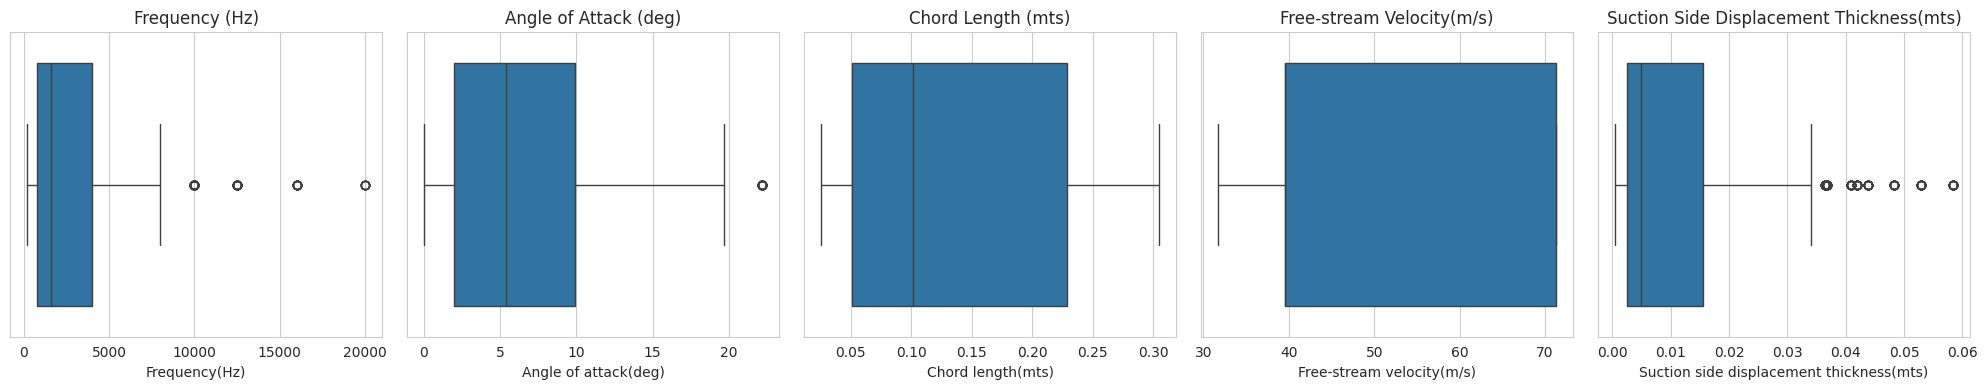

In [ ]:
# Visualizacion de outliers para analizar los valores atipicos de cada una de las variables.
plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
sns.boxplot(x=df['Frequency(Hz)'])
plt.title('Frequency (Hz)')
plt.subplot(1, 5, 2)
sns.boxplot(x=df['Angle of attack(deg)'])
plt.title('Angle of Attack (deg)')
plt.subplot(1, 5, 3)
sns.boxplot(x=df['Chord length(mts)'])
plt.title('Chord Length (mts)')
plt.subplot(1, 5, 4)
sns.boxplot(x=df['Free-stream velocity(m/s)'])
plt.title('Free-stream Velocity(m/s)')
plt.subplot(1, 5, 5)
sns.boxplot(x=df['Suction side displacement thickness(mts)'])
plt.title('Suction Side Displacement Thickness(mts)')
plt.tight_layout()
plt.show()

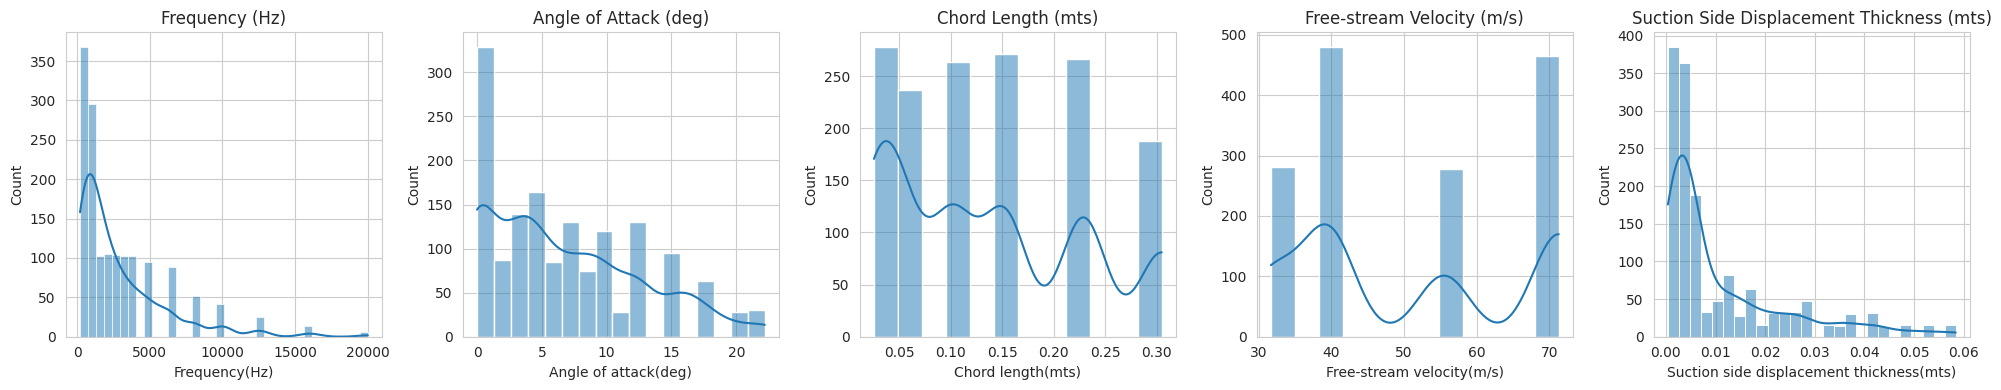

In [ ]:
#Definir tamaño de la figura

plt.figure(figsize=(20, 4))

# Histogramas con (KDE Kernel Density Estimation)
plt.subplot(1, 5, 1)
sns.histplot(df['Frequency(Hz)'], kde=True)
plt.title('Frequency (Hz)')


plt.subplot(1, 5, 2)
sns.histplot(df['Angle of attack(deg)'], kde=True)
plt.title('Angle of Attack (deg)')


plt.subplot(1, 5, 3)
sns.histplot(df['Chord length(mts)'], kde=True)
plt.title('Chord Length (mts)')

plt.subplot(1, 5, 4)
sns.histplot(df['Free-stream velocity(m/s)'], kde=True)
plt.title('Free-stream Velocity (m/s)')


plt.subplot(1, 5, 5)
sns.histplot(df['Suction side displacement thickness(mts)'], kde=True)
plt.title('Suction Side Displacement Thickness (mts)')

plt.tight_layout()
plt.show()

In [ ]:
# Analisis de los quartiles y la media de los datos que fueron graficados
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Frequency(Hz)                               3200.000000
Angle of attack(deg)                           7.900000
Chord length(mts)                              0.177800
Free-stream velocity(m/s)                     31.700000
Suction side displacement thickness(mts)       0.013041
Scaled sound pressure level(dB)                9.804500
dtype: float64


In [ ]:
df_copy = df.copy()
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores atípicos en la copia del DataFrame
df_cleaned = df_copy[~((df_copy < (Q1 - 1.5 * IQR)) | (df_copy > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar la forma del DataFrame limpio
print(df_cleaned.shape)


(1263, 6)


In [ ]:
print(df.shape)

(1503, 6)


# **PRUBEA 2 (SIN OUTLIERS)**
----


In [ ]:

XC = df_cleaned.copy()
yC = XC.pop('Scaled sound pressure level(dB)')

X_trainC, X_testC, y_trainC, y_testC = train_test_split(XC, yC, test_size=0.3, random_state=42)

print(df_cleaned.shape)
print(X_trainC.shape)
print(X_testC.shape)
print(y_trainC.shape)
print(y_testC.shape)


(1263, 6)
(884, 5)
(379, 5)
(884,)
(379,)


In [ ]:
y_trainC = y_trainC.values.reshape(884,1)
y_testC = y_testC.values.reshape(379,1)
print(y_trainC.shape)
print(y_testC.shape)

(884, 1)
(379, 1)


In [ ]:
x = np.ones((884, 6))
x[:, 1:] = X_trainC
y = y_trainC
x_prod = np.dot(np.transpose(x),x)
x_inv = np.linalg.inv(x_prod)
x_comp = np.dot(x_inv,np.transpose(x))
theta = np.dot(x_comp, y)
print(theta)


[[ 1.32696468e+02]
 [-1.47876732e-03]
 [-4.97984576e-01]
 [-3.17708820e+01]
 [ 9.37003598e-02]
 [-6.74866807e+01]]


In [ ]:
y_hat_trainC = 132.696468 - 0.00147876732 * X_trainC.values[:,0] - 0.497984576 * X_trainC.values[:,1] - 31.7708820 * X_trainC.values[:,2] + 0.0937003598 * X_trainC.values[:,3] - 67.4866807 * X_trainC.values[:,4]
y_hat_trainC = y_hat_trainC.reshape(884,1)


print(y_hat_trainC[:5])


[[121.15483655]
 [129.91881957]
 [126.80649175]
 [121.12617202]
 [122.11844273]]


In [ ]:
y_hat_testC = 132.696468 - 0.00147876732 * X_testC.values[:,0] - 0.497984576 * X_testC.values[:,1] - 31.7708820 * X_testC.values[:,2] + 0.0937003598 * X_testC.values[:,3] - 67.4866807 * X_testC.values[:,4]
y_hat_testC = y_hat_testC.reshape(379,1)


print(y_hat_testC[:5])


[[128.11069746]
 [129.22704844]
 [127.61704974]
 [123.20955318]
 [121.7180243 ]]


In [ ]:
print(y_trainC.shape)
print(y_hat_trainC.shape)

(884, 1)
(884, 1)


In [ ]:
sum = 0
for i in range(884):
    sum = sum + (y_trainC[i, :] - y_hat_trainC[i, :]) ** 2

mse_train = sum / 884

print(mse_train)

[20.00765581]


In [ ]:
sum = 0
for i in range(379):
    sum = sum + (y_testC[i, :] - y_hat_testC[i, :]) ** 2

mse_test = sum / 379

print(mse_test)

[23.19845792]


In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(y_trainC, y_hat_trainC)
print('coef: %.3f' % slr.coef_)
print('Intercept: %.3f' % slr.intercept_)

coef: 0.443
Intercept: 70.207


<ipython-input-41-2e2eef7473c1>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('coef: %.3f' % slr.coef_)
<ipython-input-41-2e2eef7473c1>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f' % slr.intercept_)


In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(y_testC, y_hat_testC)
print('coef: %.3f' % slr.coef_)
print('Intercept: %.3f' % slr.intercept_)

coef: 0.425
Intercept: 72.105


<ipython-input-42-3e991fd56237>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('coef: %.3f' % slr.coef_)
<ipython-input-42-3e991fd56237>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Intercept: %.3f' % slr.intercept_)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_trainC,y_trainC)
print('coef: ',lr.coef_)
print('Intercept: ', lr.intercept_)

coef:  [[-1.47876732e-03 -4.97984576e-01 -3.17708820e+01  9.37003598e-02
  -6.74866807e+01]]
Intercept:  [132.69646777]


## **GRADIENTE DESCENDENTE**

In [ ]:
# Definición de la función
def funcion_costo(theta, X, y):
    # Calcula las predicciones y_gorro multiplicando la matriz de características X por los parámetros theta
    # y luego aplanando el resultado a un arreglo unidimensional
    y_gorro = X.dot(theta).flatten()

    # Calcula el error restando las predicciones y_gorro de las etiquetas reales y
    error = (y_gorro - y)

    # Obtiene el número de muestras en el conjunto de datos, que es el tamaño de la primera dimensión de la matriz de características X
    m = X.shape[0]

    # Calcula el error cuadrático medio (MSE) dividiendo la suma de los cuadrados de los errores por el número de muestras m
    mse = (1.0 / m) * np.sum(np.square(error))

    # Calcula el gradiente del costo con respecto a theta utilizando el producto punto entre el error y la matriz de características X,
    # y luego dividiendo por el número de muestras m
    gradiente = (1.0 / m) * error.dot(X)

    # Retorna tanto el gradiente calculado como el error cuadrático medio
    return gradiente, mse

In [ ]:
def gradiente_descendente(learning_rate, X, y, tol=1e-8, max_iter=10000):
    # Inicialización de variables
    convergencia = False  # Variable para verificar si se ha alcanzado la convergencia
    iteracion = 0  # Contador de iteraciones
    theta = np.random.random(X.shape[1])  # Inicialización de los parámetros theta de forma aleatoria
    cost = 0  # Costo inicial
    old_coef, old_cost_f = [], []  # Listas para almacenar los coeficientes antiguos y los costos antiguos

    # Bucle principal del descenso de gradiente
    while not convergencia:
        # Calcula el gradiente y el costo actual utilizando la función_costo previamente definida
        gradiente, cost_plus = funcion_costo(theta, X, y)

        # Calcula los nuevos parámetros theta utilizando el learning_rate
        new_theta = theta - learning_rate * gradiente

        # Almacena los parámetros theta anteriores y los costos anteriores
        old_coef.append(theta)
        old_cost_f.append(cost_plus)

        # Verifica si se ha alcanzado la convergencia
        if abs(cost - cost_plus) <= tol:
            print('Convergencia después de', iteracion, 'iteraciones')
            convergencia = True

        # Actualiza el costo y los parámetros theta para la siguiente iteración
        cost = cost_plus
        iteracion += 1
        theta = new_theta

        # Verifica si se han alcanzado el número máximo de iteraciones
        if iteracion == max_iter:
            print('Máximas iteraciones alcanzadas!!')
            convergencia = True

    return theta, old_coef, old_cost_f

In [ ]:
print(df.columns)

Index(['Frequency(Hz)', 'Angle of attack(deg)', 'Chord length(mts)',
       'Free-stream velocity(m/s)', 'Suction side displacement thickness(mts)',
       'Scaled sound pressure level(dB)'],
      dtype='object')


In [ ]:
# Extraer la columna 'Sales' como el vector objetivo y almacenarla en 'y'
yg = df_cleaned.copy()
yg = yg.pop('Scaled sound pressure level(dB)')

# Crear una matriz de unos con 6 columnas y el mismo número de filas que df_cleaned
Xg = np.ones((df_cleaned['Frequency(Hz)'].shape[0], 6))  # Crea una matriz de unos con 6 columnas y el mismo número de filas que df_cleaned
Xg[:, 1] = df_cleaned['Frequency(Hz)']  # Asigna la columna 'Frequency(Hz)' a la segunda columna de Xg (índice 1)
Xg[:, 2] = df_cleaned['Angle of attack(deg)']  # Asigna la columna 'Angle of attack(deg)' a la tercera columna de Xg (índice 2)
Xg[:, 3] = df_cleaned['Chord length(mts)']  # Asigna la columna 'Chord length(mts)' a la cuarta columna de Xg (índice 3)
Xg[:, 4] = df_cleaned['Free-stream velocity(m/s)']  # Asigna la columna 'Free-stream velocity(m/s)' a la quinta columna de Xg (índice 4)
Xg[:, 5] = df_cleaned['Suction side displacement thickness(mts)']  # Asigna la columna 'Suction side displacement thickness(mts)' a la sexta columna de Xg (índice 5)

# Verificar la forma (shape) de la matriz X
print(Xg.shape)

(1263, 6)


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(Xg)

In [ ]:
x_trainCC, x_testCC, y_trainCC, y_testCC = train_test_split(X_scaled, yg, test_size=0.3, random_state=20)
x_trainCC.shape, x_testCC.shape

((884, 6), (379, 6))

In [ ]:
theta, old_coef, cost_fun = gradiente_descendente(0.1, x_trainCC, y_trainCC)
print(theta)


Convergencia después de 8829 iteraciones
[ 6.62509375e-02  6.17488296e+01  1.97870946e+02  1.01849548e+02
  2.86660425e+01 -9.05895629e+01]


In [ ]:
print(cost_fun)

[15725.455607855276, 13876.26551034499, 12285.843371929732, 10917.835337446528, 9740.997505941226, 8728.477612111938, 7857.1976847084525, 7107.323487120947, 6461.808540811395, 5906.00224715652, 5427.3130971132505, 5014.919224775388, 4659.51964948839, 4353.120486758256, 4088.8512122426405, 3860.8067541353175, 3663.9117831379713, 3493.804079611477, 3346.7342961480877, 3219.4798107923834, 3109.270690130633, 3013.726059915069, 2930.799420193983, 2858.7316475828043, 2796.0106040645605, 2741.336423614308, 2693.5916784942256, 2651.815739265889, 2615.182738993652, 2582.9826349852274, 2554.604932638078, 2529.5246971706083, 2507.2905316230076, 2487.5142447233484, 2469.8619710698586, 2454.046539473553, 2439.8209140044046, 2426.9725569489146, 2415.318584084413, 2404.7016008930095, 2394.986123994881, 2386.0555055362984, 2377.8092898320733, 2370.1609415006897, 2363.0358928718833, 2356.3698657872137, 2350.107429223022, 2344.2007595871637, 2338.608575200706, 2333.295220480532, 2328.229878780577, 2323.

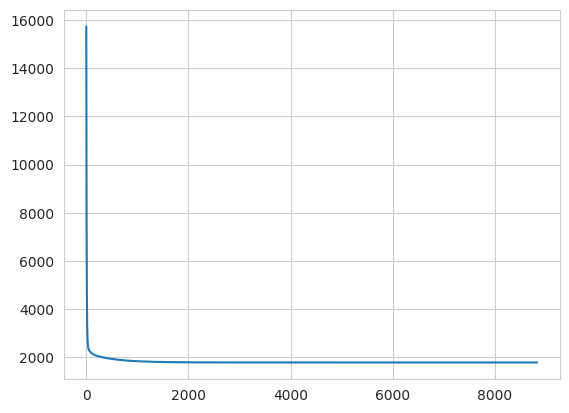

In [ ]:
plt.plot(cost_fun)
plt.show()

In [ ]:
y_gorro_test = np.dot(x_testCC,theta)
y_gorro_test.shape, y_testCC.shape

((379,), (379,))

In [ ]:
MSE = mean_squared_error(y_testCC,y_gorro_test)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_testCC,y_gorro_test)
R2 = r2_score(y_testCC,y_gorro_test)

In [ ]:
MSE, RMSE, MAE, R2

(1565.0058874137942, 39.56015530067841, 31.393734411744457, -39.36622704379012)

In [ ]:
import plotly.graph_objects as go  # Importar la librería plotly

# Crear la figura base
fig = go.Figure()  # Inicializar una figura de Plotly vacía

# Crear una lista de animaciones multiplicando las características de prueba con los coeficientes antiguos
animaciones = [np.dot(x_testCC, old_coef[i]) for i in range(len(old_coef))]

# Agregar un rastro de puntos en 3D para los datos de prueba
fig.add_trace(go.Scatter3d(
    x=x_testCC[:, 1],  # Coordenadas X de los datos de prueba
    y=x_testCC[:, 2],  # Coordenadas Y de los datos de prueba
    z=y_testCC,  # Coordenadas Z de los datos de prueba (etiquetas)
    mode='markers',  # Modo de trazado como puntos
    marker=dict(size=4, color='red'),  # Configuración del marcador
    name='Datos'  # Etiqueta para la leyenda
))

# Lista de frames para la animación
frames = []

# Agregar cada animación como un frame en la lista de frames
for i, animacion in enumerate(animaciones):
    frame_name = f'Frame {i+1}'  # Nombre del cuadro
    frame = go.Frame(data=[go.Mesh3d(
        x=x_testCC[:, 1],  # Coordenadas X para el mesh (animación)
        y=x_testCC[:, 2],  # Coordenadas Y para el mesh (animación)
        z=animacion,  # Coordenadas Z para el mesh (animación)
        color='blue'  # Color del mesh
    )], name=frame_name)
    frames.append(frame)

# Configuración de los botones de animación
updatemenus = [dict(
    type='buttons',  # Tipo de botones
    showactive=False,  # No mostrar botones activos
    buttons=[dict(
        label='Play',  # Etiqueta del botón de reproducción
        method='animate',  # Método para iniciar la animación
        args=[None, dict(
            frame=dict(duration=500, redraw=True),  # Duración y actualización de los cuadros
            fromcurrent=True,  # Empezar desde el cuadro actual
            transition=dict(duration=0)  # Duración de la transición
        )]
    )]
)]

# Configuración de la animación en la figura
fig.frames = frames  # Asignar la lista de frames a la figura
fig.update_layout(updatemenus=updatemenus)  # Configurar los botones de animación en el diseño de la figura

# Mostrar el gráfico interactivo con la animación
fig.show()


# **PRUEBA 3 (NORMALIZACION)**
---



In [ ]:
df_normalize = df.copy()

cols_to_normalize = ['Frequency(Hz)', 'Angle of attack(deg)', 'Chord length(mts)',
                     'Free-stream velocity(m/s)', 'Suction side displacement thickness(mts)']
scaler = RobustScaler()
df_normalize[cols_to_normalize] = scaler.fit_transform(df_normalize[cols_to_normalize])

df_normalize.head()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar columnas que necesitan normalización
cols_to_normalize = ['Frequency(Hz)', 'Angle of attack(deg)', 'Chord length(mts)',
                     'Free-stream velocity(m/s)', 'Suction side displacement thickness(mts)']

# Aplicar MinMaxScaler a la copia del DataFrame df_normalize
scaler = MinMaxScaler()
df_normalize[cols_to_normalize] = scaler.fit_transform(df_normalize[cols_to_normalize])

# Mostrar las primeras filas de la copia del DataFrame con los datos normalizados
df_normalize.head()



In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas que necesitan normalización
cols_to_normalize = ['Frequency(Hz)', 'Angle of attack(deg)', 'Chord length(mts)',
                     'Free-stream velocity(m/s)', 'Suction side displacement thickness(mts)']

# Aplicar StandardScaler a la copia del DataFrame df_normalize
scaler = StandardScaler()
df_normalize[cols_to_normalize] = scaler.fit_transform(df_normalize[cols_to_normalize])

# Mostrar las primeras filas de la copia del DataFrame con los datos normalizados
df_normalize.head()



In [ ]:
print(df_normalize.shape)

In [ ]:

Xn = df_normalize.copy()
yn = Xn.pop('Scaled sound pressure level(dB)')

X_trainn, X_testn, y_trainn, y_testn = train_test_split(Xn, yn, test_size=0.3, random_state=42)

y_trainn = y_trainn.values.reshape(1052,1)
y_testn = y_testn.values.reshape(451,1)

print(X_trainn.shape)
print(X_testn.shape)
print(y_trainn.shape)
print(y_testn.shape)


In [ ]:
x = np.ones((1052,6))
x[:, 1:] = X_trainn
y = y_trainn
x_prod = np.dot(np.transpose(x),x)
x_inv = np.linalg.inv(x_prod)
x_comp = np.dot(x_inv,np.transpose(x))
theta = np.dot(x_comp, y)
print(theta)

In [ ]:
y_hat_trainn = 124.93491747 - 4.01055272 * X_trainn.values[:,0] - 2.1609217 * X_trainn.values[:,1] - 3.23701856 * X_trainn.values[:,2] + 1.55662588 * X_trainn.values[:,3] - 2.06655176 * X_trainn.values[:,4]
y_hat_trainn = y_hat_trainn.reshape(1052,1)


print(y_hat_trainn[:6])

In [ ]:
y_hat_testn = 124.93491747 - 4.01055272 * X_testn.values[:,0] - 2.1609217 * X_testn.values[:,1] - 3.23701856 * X_testn.values[:,2] + 1.55662588 * X_testn.values[:,3] - 2.06655176 * X_testn.values[:,4]
y_hat_testn = y_hat_testn.reshape(451,1)


print(y_hat_testn[:6])

In [ ]:
sum = 0
for i in range(1052):
    sum = sum + (y_trainn[i, :] - y_hat_trainn[i, :]) ** 2

mse_train = sum / 1052

print(mse_train)

In [ ]:
sum = 0
for i in range(451):
    sum = sum + (y_testn[i, :] - y_hat_testn[i, :]) ** 2

mse_test = sum / 451

print(mse_test)

In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(y_trainn, y_hat_trainn)
print('coef: %.3f' % slr.coef_)
print('Intercept: %.3f' % slr.intercept_)

In [ ]:
ygn = df_normalize.copy()
ygn = ygn.pop('Scaled sound pressure level(dB)')

# Crear una matriz de unos con 6 columnas y el mismo número de filas que df_cleaned
Xgn = np.ones((df_normalize['Frequency(Hz)'].shape[0], 6))  # Crea una matriz de unos con 6 columnas y el mismo número de filas que df_cleaned
Xgn[:, 1] = df_normalize['Frequency(Hz)']  # Asigna la columna 'Frequency(Hz)' a la segunda columna de Xg (índice 1)
Xgn[:, 2] = df_normalize['Angle of attack(deg)']  # Asigna la columna 'Angle of attack(deg)' a la tercera columna de Xg (índice 2)
Xgn[:, 3] = df_normalize['Chord length(mts)']  # Asigna la columna 'Chord length(mts)' a la cuarta columna de Xg (índice 3)
Xgn[:, 4] = df_normalize['Free-stream velocity(m/s)']  # Asigna la columna 'Free-stream velocity(m/s)' a la quinta columna de Xg (índice 4)
Xgn[:, 5] = df_normalize['Suction side displacement thickness(mts)']  # Asigna la columna 'Suction side displacement thickness(mts)' a la sexta columna de Xg (índice 5)

# Verificar la forma (shape) de la matriz X
print(Xgn.shape)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(Xgn)
X_trainN, X_testN, y_trainN, y_testN = train_test_split(Xgn, ygn, test_size=0.3, random_state=42)
X_trainN.shape, X_testN.shape

In [ ]:
theta, old_coef, cost_fun = gradiente_descendente(0.1, X_trainN, y_trainN)
print(theta)

In [ ]:
print(cost_fun)
plt.plot(cost_fun)
plt.show()

In [ ]:
y_gorro_test = np.dot(X_testN,theta)
y_gorro_test.shape, y_testN.shape

In [ ]:
MSE = mean_squared_error(y_testN,y_gorro_test)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_testN,y_gorro_test)
R2 = r2_score(y_testN,y_gorro_test)
MSE, RMSE, MAE, R2

In [ ]:
import plotly.graph_objects as go  # Importar la librería plotly

# Crear la figura base
fig = go.Figure()  # Inicializar una figura de Plotly vacía

# Crear una lista de animaciones multiplicando las características de prueba con los coeficientes antiguos
animaciones = [np.dot(X_testN, old_coef[i]) for i in range(len(old_coef))]

# Agregar un rastro de puntos en 3D para los datos de prueba
fig.add_trace(go.Scatter3d(
    x=X_testN[:, 1],  # Coordenadas X de los datos de prueba
    y=X_testN[:, 2],  # Coordenadas Y de los datos de prueba
    z=y_testN,  # Coordenadas Z de los datos de prueba (etiquetas)
    mode='markers',  # Modo de trazado como puntos
    marker=dict(size=4, color='red'),  # Configuración del marcador
    name='Datos'  # Etiqueta para la leyenda
))

# Lista de frames para la animación
frames = []

# Agregar cada animación como un frame en la lista de frames
for i, animacion in enumerate(animaciones):
    frame_name = f'Frame {i+1}'  # Nombre del cuadro
    frame = go.Frame(data=[go.Mesh3d(
        x=X_testN[:, 1],  # Coordenadas X para el mesh (animación)
        y=X_testN[:, 2],  # Coordenadas Y para el mesh (animación)
        z=animacion,  # Coordenadas Z para el mesh (animación)
        color='blue'  # Color del mesh
    )], name=frame_name)
    frames.append(frame)

# Configuración de los botones de animación
updatemenus = [dict(
    type='buttons',  # Tipo de botones
    showactive=False,  # No mostrar botones activos
    buttons=[dict(
        label='Play',  # Etiqueta del botón de reproducción
        method='animate',  # Método para iniciar la animación
        args=[None, dict(
            frame=dict(duration=500, redraw=True),  # Duración y actualización de los cuadros
            fromcurrent=True,  # Empezar desde el cuadro actual
            transition=dict(duration=0)  # Duración de la transición
        )]
    )]
)]

# Configuración de la animación en la figura
fig.frames = frames  # Asignar la lista de frames a la figura
fig.update_layout(updatemenus=updatemenus)  # Configurar los botones de animación en el diseño de la figura

# Mostrar el gráfico interactivo con la animación
fig.show()

# **Cluster**

In [ ]:

# Visualización de los clusters en función de 'Frequency(Hz)' y 'Angle of attack(deg)'
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x=df['Frequency(Hz)'], y=df['Angle of attack(deg)'], hue=df['Cluster'], palette='viridis')
#plt.title('Clusters en función de Frecuencia y Ángulo de Ataque')
#plt.show()

# Otra visualización en función de 'Free-stream velocity(m/s)' y 'Scaled sound pressure level(dB)'
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x=df['Free-stream velocity(m/s)'], y=df['Scaled sound pressure level(dB)'], hue=df['Cluster'], palette='viridis')
#plt.title('Clusters en función de Velocidad de Flujo Libre y Nivel de Presión Sonora')
#plt.show()


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de los Errores al Cuadrado (SSE)')
plt.show()


In [ ]:

# Escalar los datos
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df)

# Aplicar K-Means con 5 clusters
#kmeans = KMeans(n_clusters=3, random_state=42)
#df['Cluster'] = kmeans.fit_predict(df_scaled)

# Mostrar los resultados
#df.head()


In [ ]:

# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# Seleccionar tres variables para la visualización 3D
# x = df['Frequency(Hz)']
# y = df['Angle of attack(deg)']
# z = df['Scaled sound pressure level(dB)']
# clusters = df['Cluster']

# Crear el scatter plot en 3D
# scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis', s=50)

# Configurar las etiquetas de los ejes
# ax.set_xlabel('Frequency(Hz)')
# ax.set_ylabel('Angle of attack(deg)')
# ax.set_zlabel('Scaled sound pressure level(dB)')

# Añadir una barra de color
# cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
# cbar.set_label('Cluster')

# Título del gráfico
# plt.title('Clusters en 3D')

# plt.show()

import plotly.express as px
import pandas as pd

# Crear la gráfica 3D interactiva
# fig = px.scatter_3d(df,
  #                  x='Angle of attack(deg)',
  #                  y='Suction side displacement thickness(mts)',
  #                  z='Scaled sound pressure level(dB)',
  #                  color='Cluster',
  #                  title='Clusters en 3D Interactivo',
  #                  labels={
  #                      'Frequency(Hz)': 'Frecuencia (Hz)',
  #                      'Angle of attack(deg)': 'Ángulo de Ataque (°)',
  #                      'Scaled sound pressure level(dB)': 'Nivel de Presión Sonora Escalado (dB)',
  #                      'Cluster': 'Cluster'
  #                  })

# Mostrar la gráfica
#fig.show()

import plotly.express as px

# Group the DataFrame by 'Cluster'
#grouped = df.groupby('Cluster')

#for cluster_id, cluster_data in grouped:

    #fig = px.scatter_3d(cluster_data,
                        #x='Suction side displacement thickness(mts)', # Corrected column name
                        #y='Angle of attack(deg)',
                        #z='Scaled sound pressure level(dB)',
                        #title=f'Cluster {cluster_id} en 3D',
                        #labels={
                         #   'Suction side displacement thickness(mts)': 'Espesor de Desplazamiento en el Lado de Succión (m)',
                          #  'Angle of attack(deg)': 'Ángulo de Ataque (°)',
                           # 'Scaled sound pressure level(dB)': 'Nivel de Presión Sonora Escalado (dB)'
                        #})

    # Mostrar la gráfica
    #fig.show()

# **CLUSTERS**
---